In [42]:
import glossary_eval
import imp
imp.reload(glossary_eval)
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300
import pandas as pd

In [21]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

## Finetuned Sense PMI

In [5]:
sr2terms = glossary_eval.get_sr2terms()

In [4]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:04<00:00, 114.64it/s]


In [5]:
print(len(gloss_vals))
print(len(not_gloss_vals))

807
194700


In [6]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=45.583992205156946, pvalue=0.0)
MannwhitneyuResult(statistic=126277463.0, pvalue=9.80355601001791e-196)


Text(0.5, 0, 'max sense pmi')

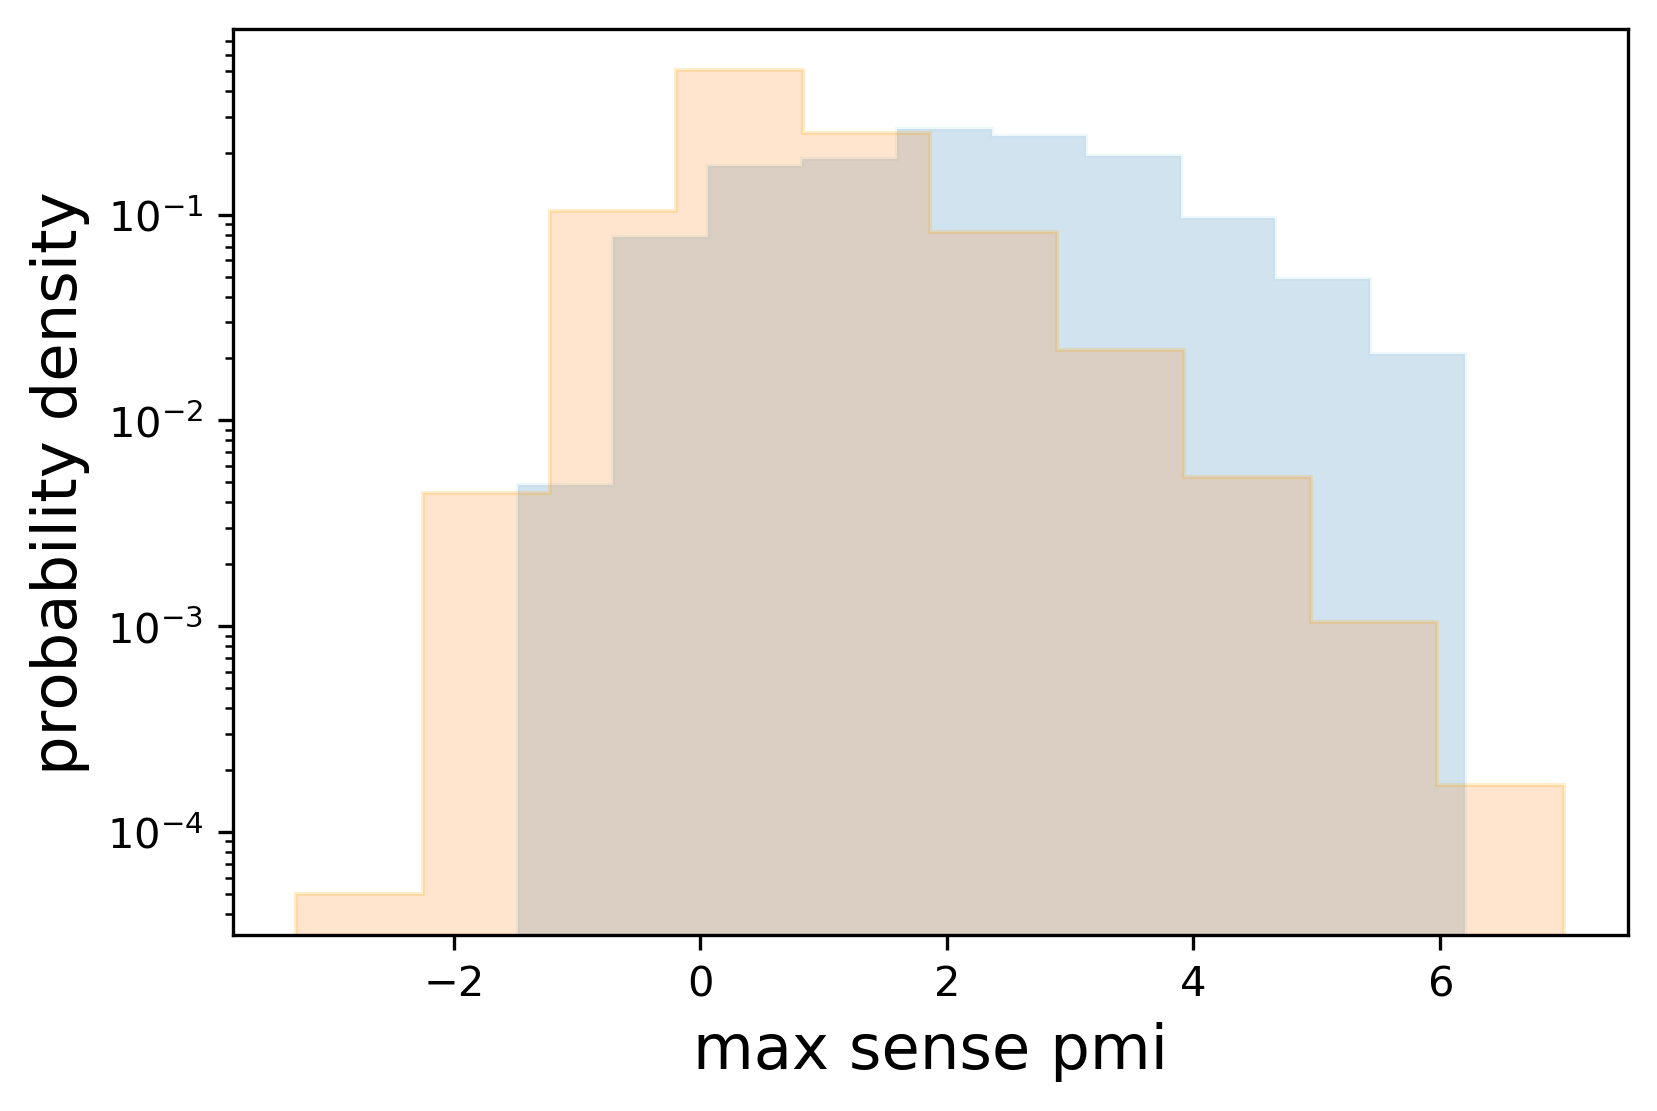

In [7]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [8]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

2.2320935456782305
0.5531910069809606


In [9]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            score = max(w2score[w])
            #if w in gloss_terms and score < 3.00:
            #    print(subreddit, w, score)
            if w not in gloss_terms and score > 4.00: 
                print(subreddit, w, score)

  2%|▏         | 11/474 [00:00<00:05, 80.49it/s]

afl lynch 5.502809029707377
afl kicking 5.428118137105788
afl sydney 5.301704212250129
afl saints 5.239951717763729
afl dusty 5.160238691950187
afl kicks 5.01194609430241
afl eagles 4.934445592566046
afl suns 4.88004124270867
afl eddie 4.7235628472318805
afl quarter 4.523084559756267
afl bloke 4.496161288487233
afl reckon 4.496079048263494
afl forwards 4.495298103280422
afl ross 4.449484274657497
afl possessions 4.431784697558096
afl quarters 4.42277562761573
afl darling 4.398804016828237
afl au 4.293138204266803
afl tackle 4.2381936229660715
afl lions 4.17751499666385
afl supporter 4.145317938198981
afl dispose 4.12379735894557
afl daisy 4.111667349353161
afl coast 4.109139849762843
afl tackling 4.104186017700872
afl bruce 4.041823775985897
afl roaming 4.0065728265150975
airforce supervisor 5.017202034087673
airforce force 4.5992191085177865
airforce duty 4.461426764143311
airforce assignment 4.450459270905859
airforce af 4.411283919463629
airforce chief 4.305094764225028
airforce mil

  8%|▊         | 39/474 [00:00<00:05, 74.21it/s]

 5.271057815051075
antimlm scheme 5.15779464677531
antimlm pyramid 5.093348658366524
antimlm oils 4.7473355716994
antimlm vector 4.371046811058091
aquariums parameters 6.226674991327428
aquariums snail 5.691876646970045
aquariums schooling 5.672527186827397
aquariums neon 5.660400747920211
aquariums shrimp 5.61676971783011
aquariums fin 5.561258503598987
aquariums gallon 5.500637416527049
aquariums planted 5.479553331362336
aquariums goldfish 5.31657884493835
aquariums sponge 5.1139658885937935
aquariums tank 5.074831453497669
aquariums pea 5.062640138440744
aquariums strips 4.99463405503891
aquariums pond 4.816031601197251
aquariums filter 4.802118005643192
aquariums stocking 4.758262435863127
aquariums fish 4.694860187423576
aquariums dwarf 4.507934344002877
aquariums bacteria 4.480709093584188
aquariums worms 4.45257455481712
aquariums stocked 4.410069884393455
aquariums rot 4.2154329851151475
aquariums tabs 4.2030104651165905
aquariums lid 4.180122791985593
aquariums cycling 4.1538

 16%|█▋        | 78/474 [00:00<00:03, 102.97it/s]

bigbrother feeds 6.441254046120797
bigbrother cliff 6.38665965712645
bigbrother jackson 5.8937824040712945
bigbrother holly 5.881903240742239
bigbrother tommy 5.049297717804797
bigbrother nick 4.85209487693794
bigbrother anthony 4.796995543575243
bigbrother sam 4.796110029212556
bigbrother victor 4.749315873689838
bigbrother premiere 4.734042553545986
bigbrother tyler 4.678137711782369
bigbrother sis 4.66855692296201
bigbrother outsiders 4.57208228457029
bigbrother jack 4.545468455988932
bigbrother jury 4.43148076306737
bigbrother diary 4.354187185828826
bigbrother twists 4.3486033316094685
bigbrother jacks 4.333588811909163
bigbrother island 4.298301660695048
bigbrother alliance 4.2417293464943775
bigbrother competitions 4.240005966132902
bigbrother survivor 4.116113917877021
bigbrother dynamics 4.108413092167413
bigbrother pawn 4.076297079519797
bigbrother raven 4.053903686499041
bigbrother paul 4.0123392620777905
bodybuilding heath 5.307020685034736
bodybuilding arnold 4.97686790681

 19%|█▉        | 90/474 [00:00<00:03, 102.33it/s]


cats rescued 4.407288782786648
cats meow 4.3934544273561835
cats handsome 4.254807641382464
cats loss 4.247268245775938
cats haired 4.237670290248947
cats sweetheart 4.222632412884407
cats adorable 4.217498931385168
cats majestic 4.1196067103348675
cats fetch 4.116853346316491
cats sweetest 4.073171122071378
cats treats 4.069951585659422
cats indoor 4.044545333011535
cats scratching 4.031926660635602
cats grumpy 4.010901411075887
childfree tubes 4.297792211029097
christianity matthew 4.873885089608443
christianity genesis 4.742949674193245
christianity supper 4.706530814706186
christianity spirit 4.6838531773196435
christianity rejoice 4.681179223508772
christianity unto 4.68009755763803
christianity brethren 4.657430043297108
christianity sins 4.6012314480378915
christianity gospel 4.578340777283655
christianity sin 4.558706621907117
christianity fathers 4.481481290769242
christianity revelation 4.459577692546377
christianity verse 4.387737776178672
christianity testament 4.383236753

 22%|██▏       | 102/474 [00:01<00:05, 69.31it/s]

clashroyale rider 6.055847113884351
clashroyale royale 5.897186757572416
clashroyale ladder 5.683275797616504
clashroyale snowball 5.581913198688701
clashroyale breakers 5.418328905112456
clashroyale skeletons 5.350956182739009
clashroyale trophies 5.2368478953307545
clashroyale challenger 5.097453822482025
clashroyale balloon 5.096640115036316
clashroyale bow 5.089043363568
clashroyale clash 5.0528815102302245
clashroyale goblin 4.914709604299003
clashroyale mortar 4.901712641911858
clashroyale dart 4.814745448456325
clashroyale earthquake 4.7921192288825845
clashroyale bats 4.765490035091264
clashroyale condition 4.7540701591840575
clashroyale clan 4.538307240127826
clashroyale royal 4.484600759041415
clashroyale gems 4.477780529678779
clashroyale countered 4.450438472090785
clashroyale trophy 4.440624859531049
clashroyale princess 4.4273168746868725
clashroyale tornado 4.397064895053595
clashroyale leveled 4.370528146919263
clashroyale wizard 4.307422629937689
clashroyale witch 4.29

 28%|██▊       | 132/474 [00:01<00:04, 76.72it/s]

4.413201345236575
datingoverthirty hinge 4.370694946367376
datingoverthirty breakers 4.23917796520888
datingoverthirty dodged 4.118923839149191
datingoverthirty date 4.011847310647747
deadbydaylight survivor 5.89575712638045
deadbydaylight killers 5.782637916505266
deadbydaylight survivors 5.637390249975466
deadbydaylight hatch 5.469768218284629
deadbydaylight killer 5.465554878393915
deadbydaylight daylight 5.178827976098106
deadbydaylight ons 4.940825778486976
deadbydaylight borrowed 4.903570954012457
deadbydaylight radius 4.884152868155355
deadbydaylight adrenaline 4.833622059508139
deadbydaylight whispers 4.829548734120503
deadbydaylight generator 4.8205702893966516
deadbydaylight billy 4.811379273828497
deadbydaylight shack 4.8008399428936555
deadbydaylight hook 4.7674684477761415
deadbydaylight pig 4.760671811384334
deadbydaylight legion 4.757071659148024
deadbydaylight weasel 4.732163077097436
deadbydaylight perk 4.684566724111383
deadbydaylight nurse 4.6771231041075225
deadbyda

 34%|███▍      | 161/474 [00:01<00:03, 97.07it/s]

4.246015525185285
dota2 miracle 4.155707298065151
dota2 creeps 4.108581992119196
dota2 turbo 4.065166840418749
dota2 lane 4.051887338215378
elderscrollsonline parse 4.368053359629692
elderscrollsonline guild 4.3235789577592465
elderscrollsonline trials 4.09445617144481
elderscrollsonline wield 4.086528868700248
elderscrollsonline clockwork 4.08023301390361
elderscrollsonline scrolls 4.077720792999687
elderscrollsonline canceling 4.028968804200274
elderscrollsonline staff 4.0080735275786905
exmormon smith 5.415766097958195
exmormon ward 5.394528257785786
exmormon brethren 5.154023983214077
exmormon essays 5.140902070784161
exmormon saints 4.99861515005726
exmormon joseph 4.951798945054549
exmormon temple 4.585449568733763
exmormon utah 4.582831490471506
exmormon prophet 4.564292976731061
exmormon revelation 4.406897668639625
exmormon church 4.384836214005898
exmormon shelf 4.296533040552094
exmormon stake 4.294366666576512
exmormon lake 4.1585532112562325
exmormon wives 4.05351954639393

 36%|███▋      | 173/474 [00:01<00:04, 72.59it/s]

 4.95023539571054
fifa flashback 4.885711841160064
fifa ifs 4.79437999159085
fifa formation 4.731206398371632
fifa icon 4.704833197833784
fifa header 4.639888914872833
fifa mane 4.535988716060134
fifa lb 4.501019838800327
fifa icons 4.387382882866083
fifa ea 4.331566222340083
fifa keeper 4.241853665346004
fifa packs 4.219266004727624
fifa backs 4.2188096823736
fifa crosses 4.184732382057077
fifa quits 4.0996670272011775
fifa hazard 4.092743283087242
fifa fodder 4.033352710896767
fifa der 4.027958702566851
fifa coins 4.027683625816108
fifa prime 4.012882125130418
fireemblemheroes refine 6.161758341076245
fireemblemheroes spiral 6.033909480069207
fireemblemheroes disrupt 5.93202433122803
fireemblemheroes gardens 5.845501173517136
fireemblemheroes ploy 5.706060955059673
fireemblemheroes hone 5.4640968179658875
fireemblemheroes slot 5.315543032416002
fireemblemheroes robin 5.306491307820702
fireemblemheroes feathers 5.1750792245861765
fireemblemheroes breakers 5.158617405554739
fireemblemh

 39%|███▉      | 187/474 [00:02<00:03, 81.66it/s]

future_fight rogers 6.478308633971219
future_fight panther 6.3853370185328835
future_fight advancement 6.269811786770773
future_fight gene 6.0864818698834044
future_fight jean 6.076917656847007
future_fight venom 5.893989642861513
future_fight torch 5.834720234403954
future_fight sinister 5.617177242646636
future_fight crystals 5.587254071430306
future_fight genes 5.583222639165855
future_fight snow 5.33586585007652
future_fight uniforms 5.331870724707972
future_fight domino 5.24350890862047
future_fight grey 5.13662435595825
future_fight fury 5.1352762672865735
future_fight marvel 5.00630634453704
future_fight morgan 4.986277825848703
future_fight uniform 4.89876223535944
future_fight ticket 4.897668505176939
future_fight gears 4.85417474983908
future_fight witch 4.784250364322453
future_fight thor 4.660474436323553
future_fight ant 4.580214691210206
future_fight nova 4.568722172359491
future_fight soldier 4.517162218414615
future_fight uncanny 4.513200271295
future_fight pierce 4.504

 55%|█████▍    | 259/474 [00:02<00:02, 100.88it/s]

4.547107305430088
godzilla unleashed 4.447898604886875
godzilla critic 4.428530600412031
godzilla roar 4.388941398322408
godzilla rotten 4.338648604268441
godzilla severed 4.280889770116248
godzilla skull 4.200548704060195
godzilla pacific 4.166324301350444
godzilla credits 4.159848952941891
godzilla audiences 4.142904027142346
godzilla titans 4.120995023607689
godzilla vhs 4.101056917206845
godzilla office 4.030561572617401
hearthstone priest 4.6840136923072535
hearthstone rogue 4.624409539809766
hearthstone rattle 4.446330637726553
hearthstone ladder 4.434236551347177
hearthstone warrior 4.408001844860434
hearthstone whisper 4.3866286522032905
hearthstone token 4.261028096367576
hearthstone vanish 4.2486410977451206
hearthstone unleash 4.182795291941742
hearthstone apprentice 4.157176324491241
hearthstone hs 4.141707885832266
hearthstone anomaly 4.135727781083757
hearthstone hunter 4.111499495633248
hearthstone deck 4.103701602901204
hearthstone heroic 4.056705794127606
hearthstone b

 70%|███████   | 334/474 [00:02<00:00, 157.73it/s]

mechanicalkeyboards switches 5.525489498036117
mechanicalkeyboards reds 5.11527094708602
mechanicalkeyboards keyboard 4.91573632792788
mechanicalkeyboards layout 4.734332000684743
mechanicalkeyboards cherry 4.73265873945921
mechanicalkeyboards springs 4.57197414303074
mechanicalkeyboards v2 4.553926859307417
mechanicalkeyboards ergo 4.460988863648148
mechanicalkeyboards ctrl 4.429662189010438
mechanicalkeyboards blanks 4.405247468930749
mechanicalkeyboards keys 4.397759994834013
mechanicalkeyboards lube 4.36361128596047
mechanicalkeyboards traces 4.288223693574412
mechanicalkeyboards sa 4.273304278568595
mechanicalkeyboards caps 4.250671754519484
mechanicalkeyboards boards 4.240926978871347
mechanicalkeyboards clears 4.240649239666673
mechanicalkeyboards assembled 4.180302357054912
mechanicalkeyboards quieter 4.15131482018166
mechanicalkeyboards compact 4.1323108987537545
mechanicalkeyboards godspeed 4.1123994039319856
mechanicalkeyboards gb 4.1018125543309845
mechanicalkeyboards stems

 76%|███████▌  | 361/474 [00:03<00:00, 139.75it/s]

purplepilldebate imperative 4.437312117577006
purplepilldebate pill 4.398110732016764
rainbow6 operator 5.098671971477093
rainbow6 hostage 4.956160056004207
rainbow6 clash 4.791495560206673
rainbow6 siege 4.639521059392636
rainbow6 ops 4.599714583898814
rainbow6 iq 4.591275806886001
rainbow6 ranked 4.5195169992486575
rainbow6 ash 4.416390044983943
rainbow6 echo 4.356016194290019
rainbow6 attacker 4.261727986981387
rainbow6 lion 4.048862018425418
rainbow6 horizon 4.042772083788013
raisedbynarcissists nm 4.9784715926995355
skincareaddiction snail 5.614043098296369
skincareaddiction prone 5.53231048739008
skincareaddiction drying 5.494048471325097
skincareaddiction lotion 5.4756915933905725
skincareaddiction elephant 5.465586820008361
skincareaddiction ordinary 5.454652918741724
skincareaddiction cleanse 5.40112447392708
skincareaddiction acid 5.399798026290456
skincareaddiction essence 5.359586990275132
skincareaddiction scars 5.244647085762337
skincareaddiction gel 5.231215909539994
ski

 82%|████████▏ | 390/474 [00:03<00:00, 164.29it/s]

starwarsbattlefront supremacy 6.267215954157709
starwarsbattlefront bane 5.834160294098233
starwarsbattlefront retribution 5.61689101769147
starwarsbattlefront trooper 5.144797709362386
starwarsbattlefront dice 4.952119695138193
starwarsbattlefront villains 4.943801191450222
starwarsbattlefront cad 4.880382986476881
starwarsbattlefront wars 4.836194152564206
starwarsbattlefront unleashed 4.750513952485462
starwarsbattlefront arcade 4.743796369972246
starwarsbattlefront gon 4.7204967261441935
starwarsbattlefront clone 4.672455246307181
starwarsbattlefront wan 4.653353552371289
starwarsbattlefront han 4.649396706695999
starwarsbattlefront vader 4.552286536816069
starwarsbattlefront clones 4.490561121551086
starwarsbattlefront detection 4.437232109799135
starwarsbattlefront surge 4.406480716815488
starwarsbattlefront reinforcement 4.392782581468252
starwarsbattlefront browser 4.268727930257048
starwarsbattlefront tx 4.222390472329153
starwarsbattlefront choke 4.074343446750807
starwarsbat

 94%|█████████▍| 447/474 [00:03<00:00, 165.91it/s]

thedivision nemesis 5.448572229545784
thedivision invaded 4.843389103510798
thedivision division 4.681514253914206
thedivision raid 4.474112687010854
thedivision exotic 4.414031162722404
thedivision ropes 4.396878520197973
thedivision unbreakable 4.390720520555775
thedivision normalized 4.373224093686668
thedivision diversity 4.366282455342664
thedivision compensated 4.210879464413548
thedivision attributes 4.033507030246782
wallstreetbets spreads 5.614368834806678
wallstreetbets spy 5.6088088268741565
wallstreetbets inverse 5.561542184358012
wallstreetbets mu 5.331092894541067
wallstreetbets tits 5.127710591198766
wallstreetbets earnings 5.008590648817724
wallstreetbets bae 4.938257406188387
wallstreetbets shares 4.757338752554434
wallstreetbets yolo 4.709311171035074
wallstreetbets portfolio 4.4910076237580165
wallstreetbets bulls 4.488855030259716
wallstreetbets highs 4.3941828754641765
wallstreetbets su 4.327924663447079
wallstreetbets puts 4.294330454793412
wallstreetbets calls 4.

100%|██████████| 474/474 [00:03<00:00, 131.57it/s]

wow har 5.493356959488124
wow horde 5.085132508887872
wow legion 5.044484890071144
wow wrath 4.809878708520861
wow alliance 4.503373031639019
wow warcraft 4.420596775702447
wow blizzard 4.203759803885301
wow expansion 4.105770877842664
wow forsaken 4.049321489590987


## Denoised Sense PMI 

In [453]:
#sr2terms = get_sr2terms()

In [454]:
'''
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))
'''

"\ngloss_vals = []\nnot_gloss_vals = []\nfor filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): \n    subreddit = filename.replace('.csv', '')\n    if subreddit not in sr2terms: continue\n    gloss_terms = set(sr2terms[subreddit])\n    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: \n        w2score = defaultdict(list)\n        reader = csv.DictReader(infile)\n        for row in reader: \n            w = row['sense'].split('#####')[0]\n            score = float(row['pmi'])\n            w2score[w].append(score)\n        for w in w2score: \n            if w in gloss_terms: \n                gloss_vals.append(max(w2score[w]))\n            else: \n                not_gloss_vals.append(max(w2score[w]))\n"

In [455]:
'''
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))
'''

"\nprint(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))\nprint(np.mean(gloss_vals))\nprint(np.mean(not_gloss_vals))\n"

In [456]:
'''
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)
'''

'\nplt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)\nplt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)\nplt.yscale(\'log\')\nplt.ylabel(\'# of words\', fontsize=15)\nplt.xlabel(\'max sense pmi\', fontsize=15)\n'

## Base Sense PMI

In [6]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:04<00:00, 108.72it/s]


In [7]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

Ttest_indResult(statistic=44.845193699421436, pvalue=0.0)
MannwhitneyuResult(statistic=125866556.5, pvalue=2.028451207806043e-192)
2.2033353420545043
0.5455516114294339


Text(0.5, 0, 'max sense pmi')

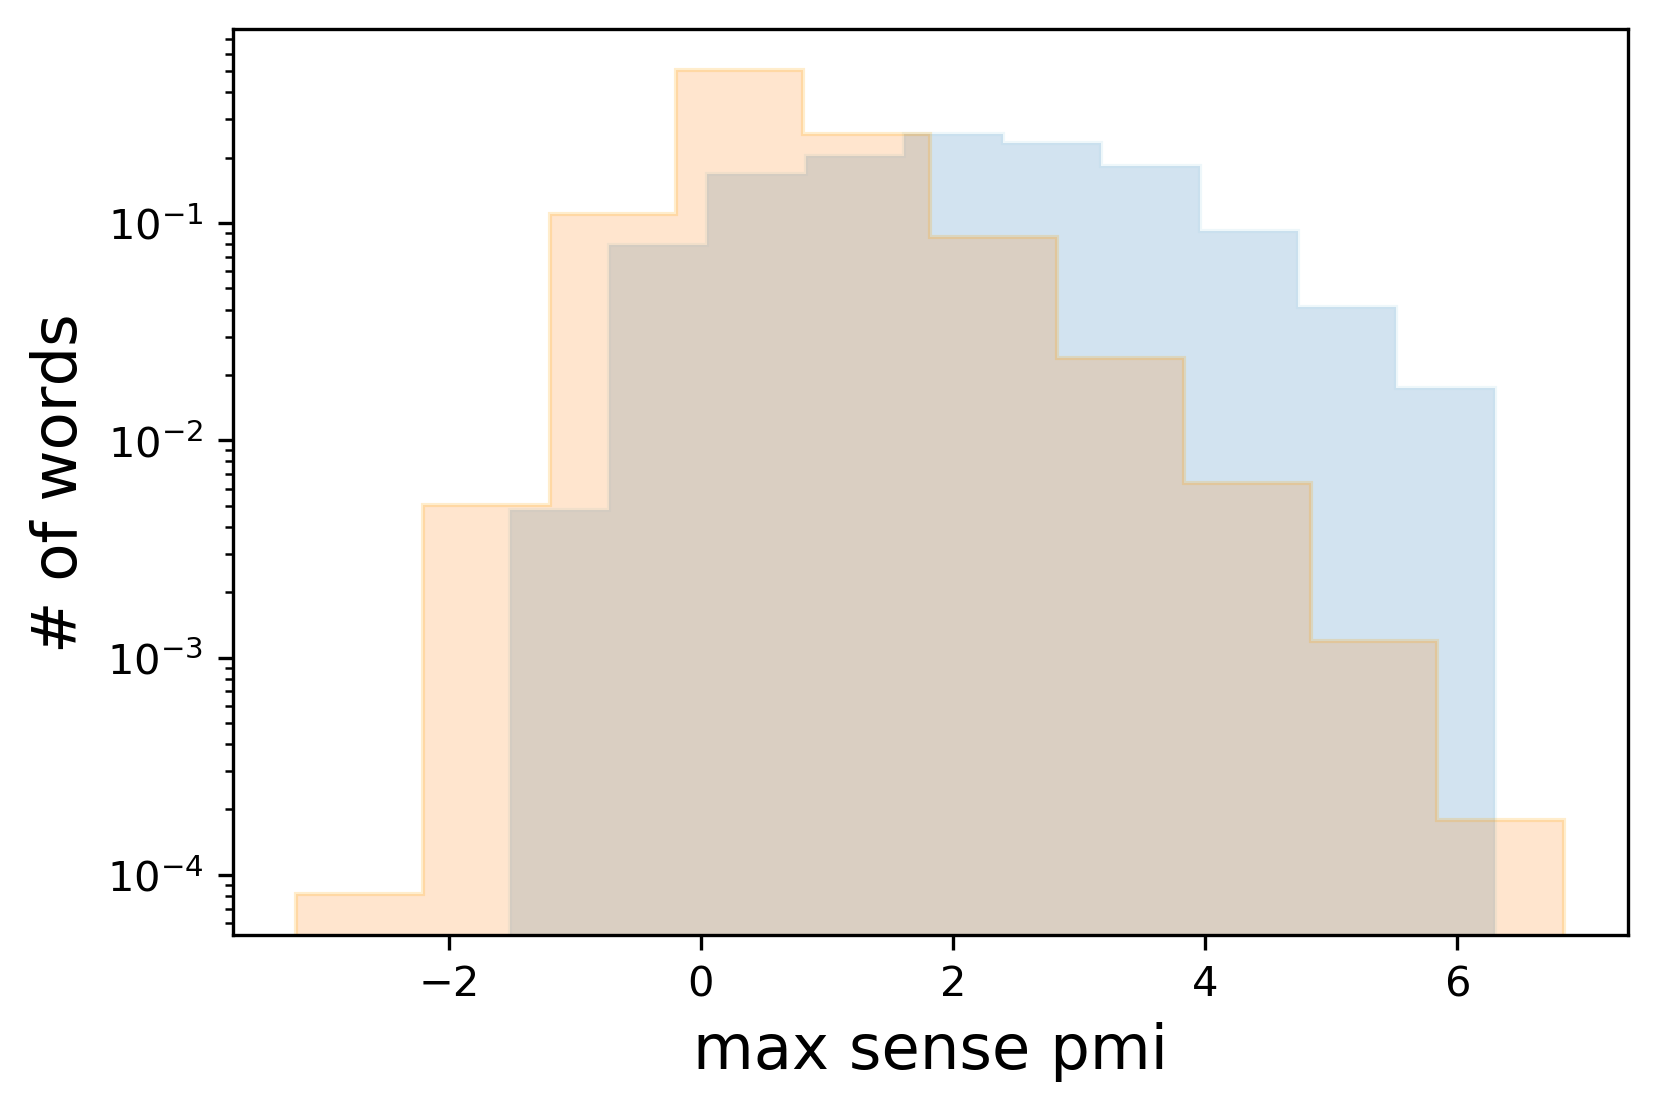

In [8]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

### Sense PMI of most common sense of a word in a subreddit

100%|██████████| 474/474 [00:00<00:00, 755.15it/s]


Ttest_indResult(statistic=44.62291429472068, pvalue=0.0)
MannwhitneyuResult(statistic=126135895.5, pvalue=1.370829130932747e-194)
2.0143405444514055
0.33440613628156346


Text(0.5, 0, 'max sense pmi')

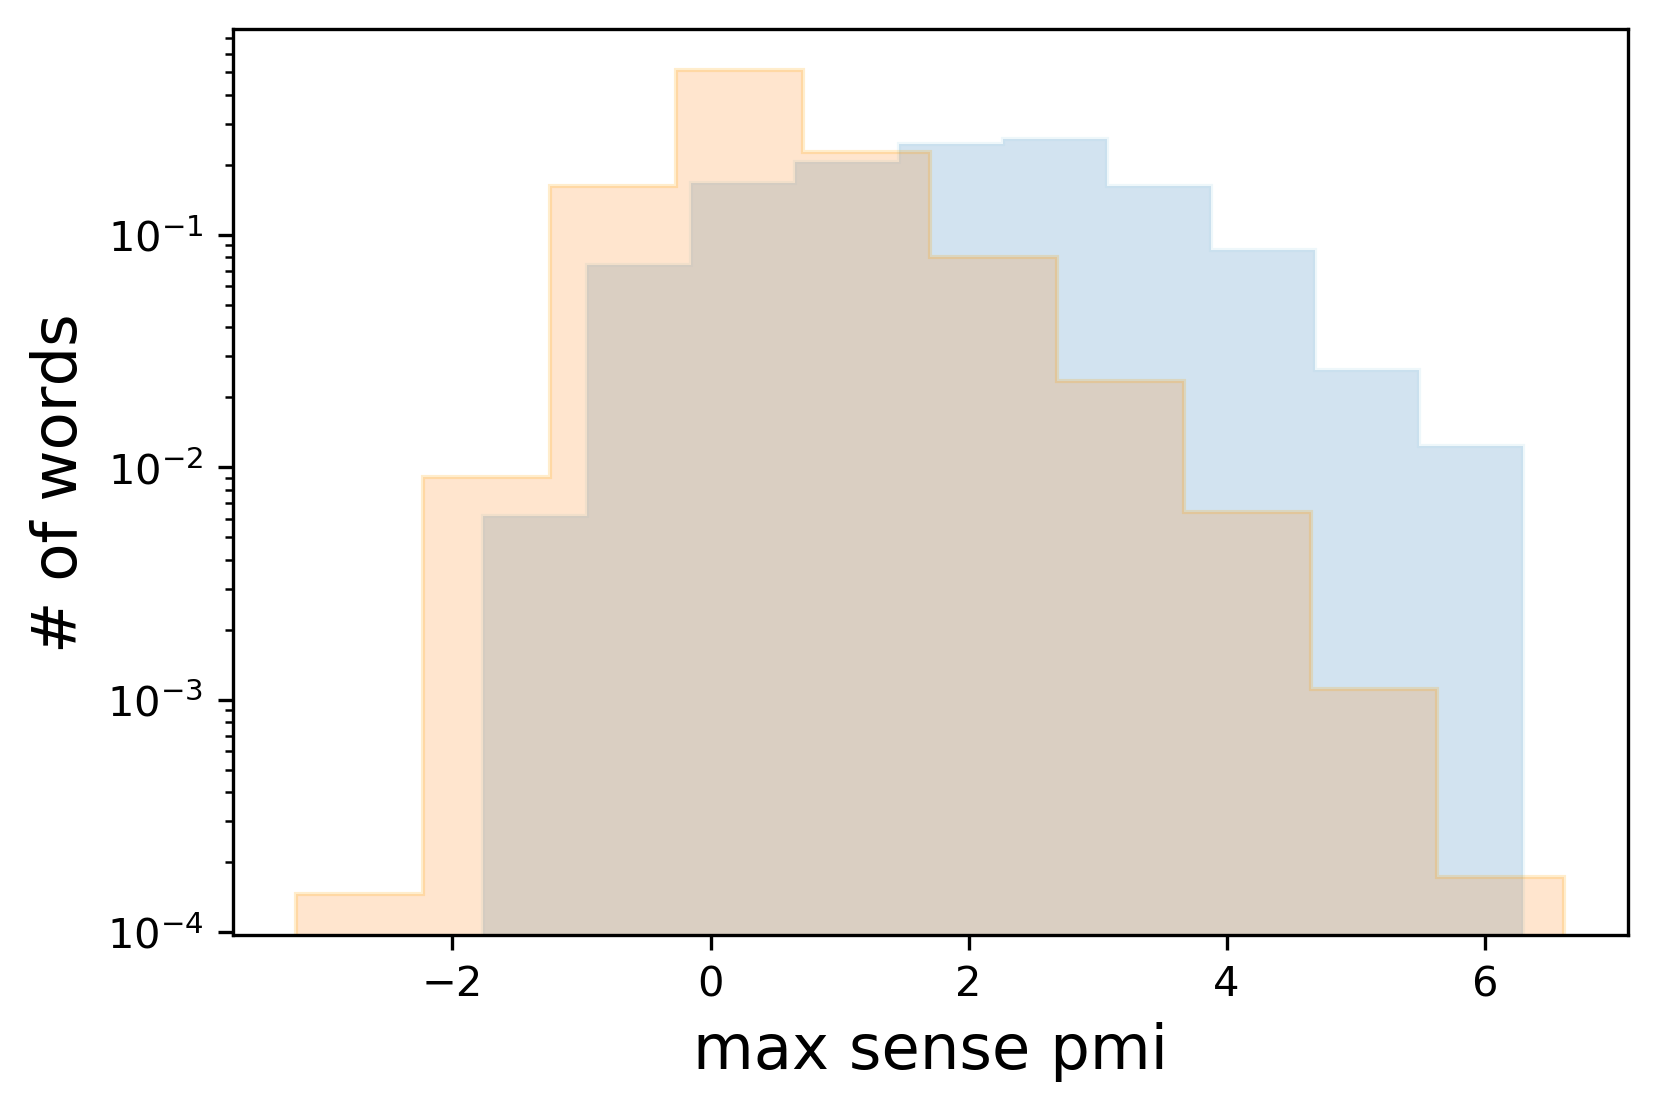

In [57]:
# sense_pmi of most common sense of a word
BASE_MOST_PMI = LOG_DIR + 'base_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

### Compare most_pmi with max_pmi for BERT embeddings

In [97]:
# compare most_pmi with max_pmi
BASE_MAX_PMI = LOG_DIR + 'base_max_sense_pmi/'
x = []
y = []
words = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(BASE_MAX_PMI + filename, encoding='utf-8').fillna('')
    df2 = pd.read_csv(BASE_MOST_PMI + filename, encoding='utf-8').fillna('')
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    words.extend(df3['word'].tolist())
    x.extend(df3['max_pmi'].tolist())
    y.extend(df3['most_pmi'].tolist())
print("Pearson r:", pearsonr(x, y))

100%|██████████| 474/474 [00:05<00:00, 81.18it/s]


Pearson r: (0.9458587375042024, 0.0)


## Substitute PMI

In [22]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 349/349 [00:03<00:00, 103.11it/s]


In [23]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

Ttest_indResult(statistic=41.09003544309452, pvalue=0.0)
MannwhitneyuResult(statistic=78966092.5, pvalue=4.1984389971577276e-163)
2.228191176536358
0.5659246416730789


Text(0.5, 0, 'max sense pmi')

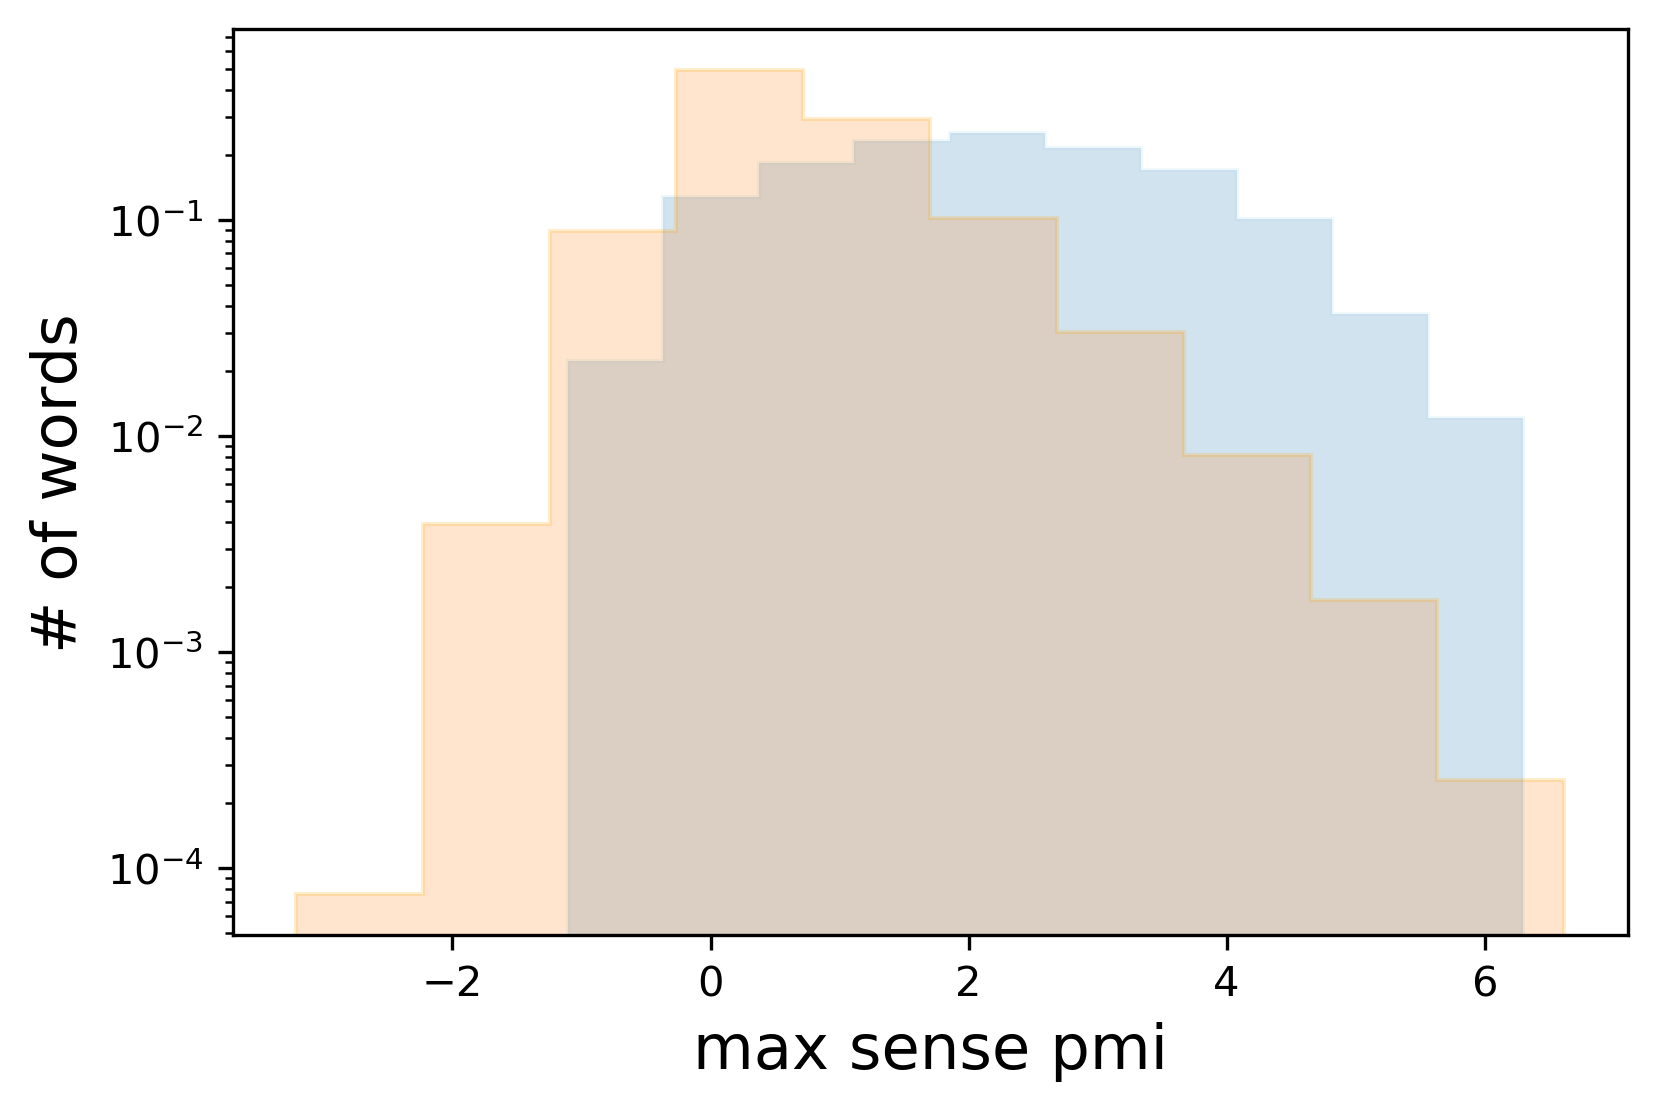

In [24]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

100%|██████████| 349/349 [00:03<00:00, 88.36it/s]


Pearson r: (0.6247216450523514, 0.0)


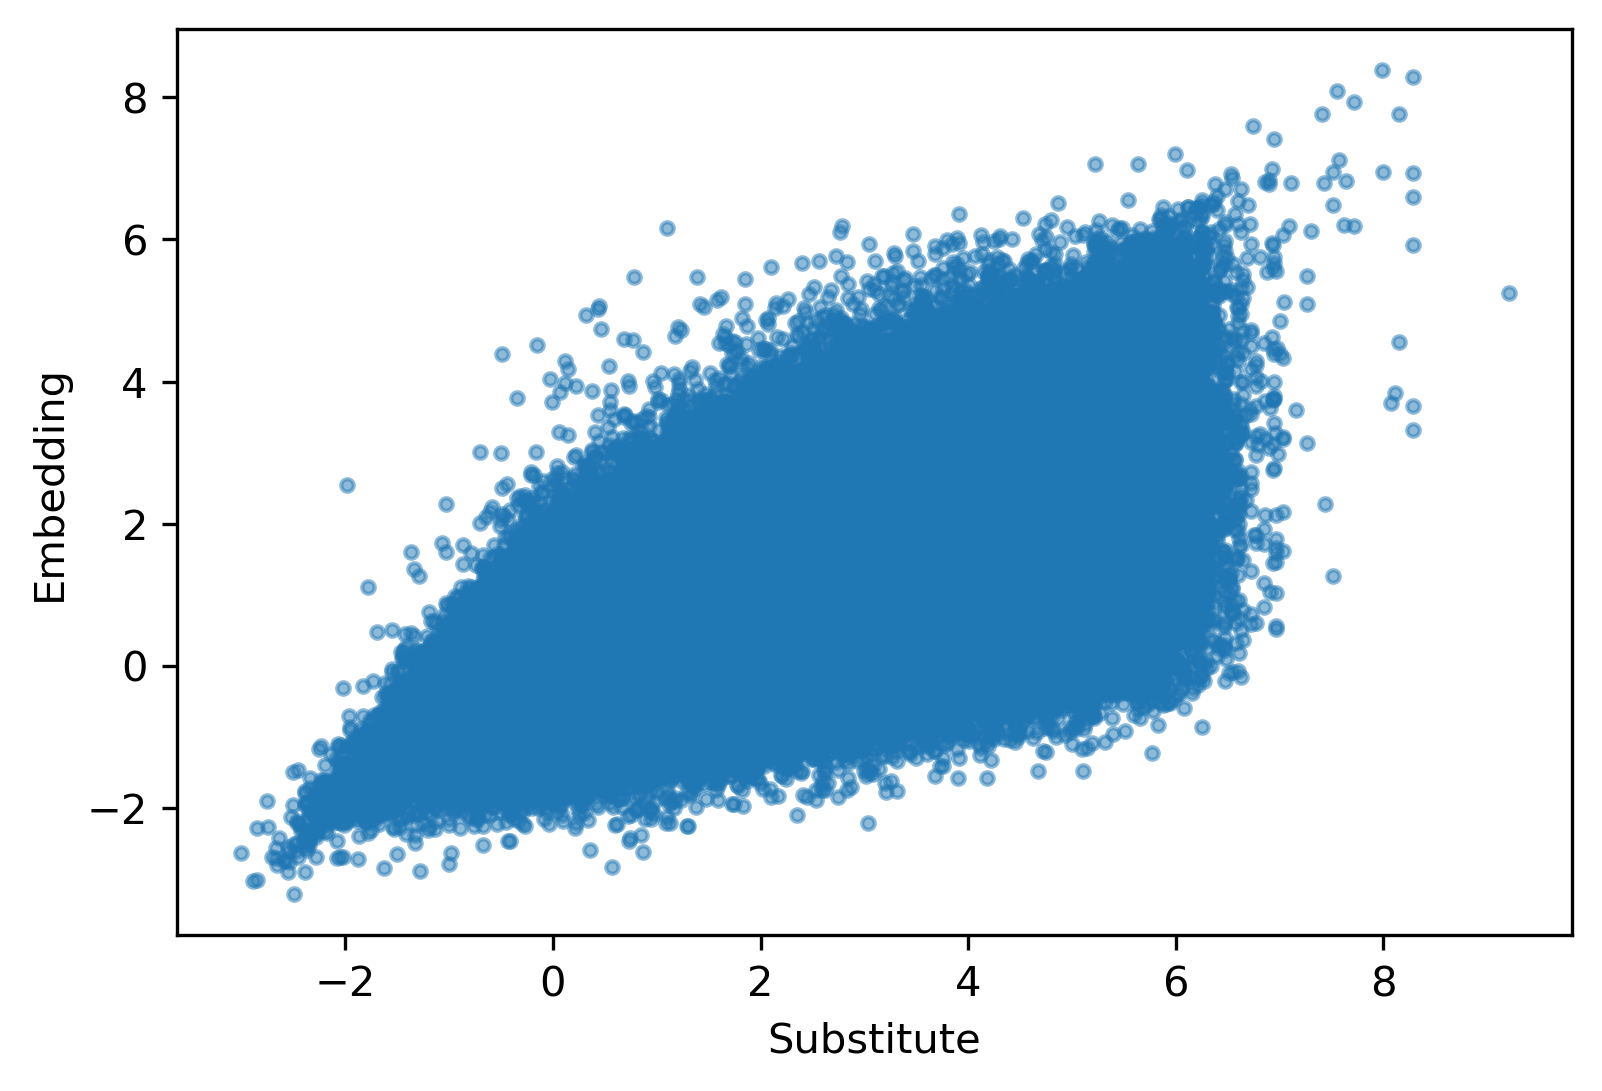

In [55]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_max_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['max_pmi_x'].tolist())
    y.extend(df3['max_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

### Sense PMI of most common sense of a word in a subreddit

100%|██████████| 349/349 [00:00<00:00, 746.73it/s]


Ttest_indResult(statistic=38.895487168624484, pvalue=0.0)
MannwhitneyuResult(statistic=78409861.5, pvalue=3.546229743367168e-157)
1.732496108750208
0.23395815110961607


Text(0.5, 0, 'max sense pmi')

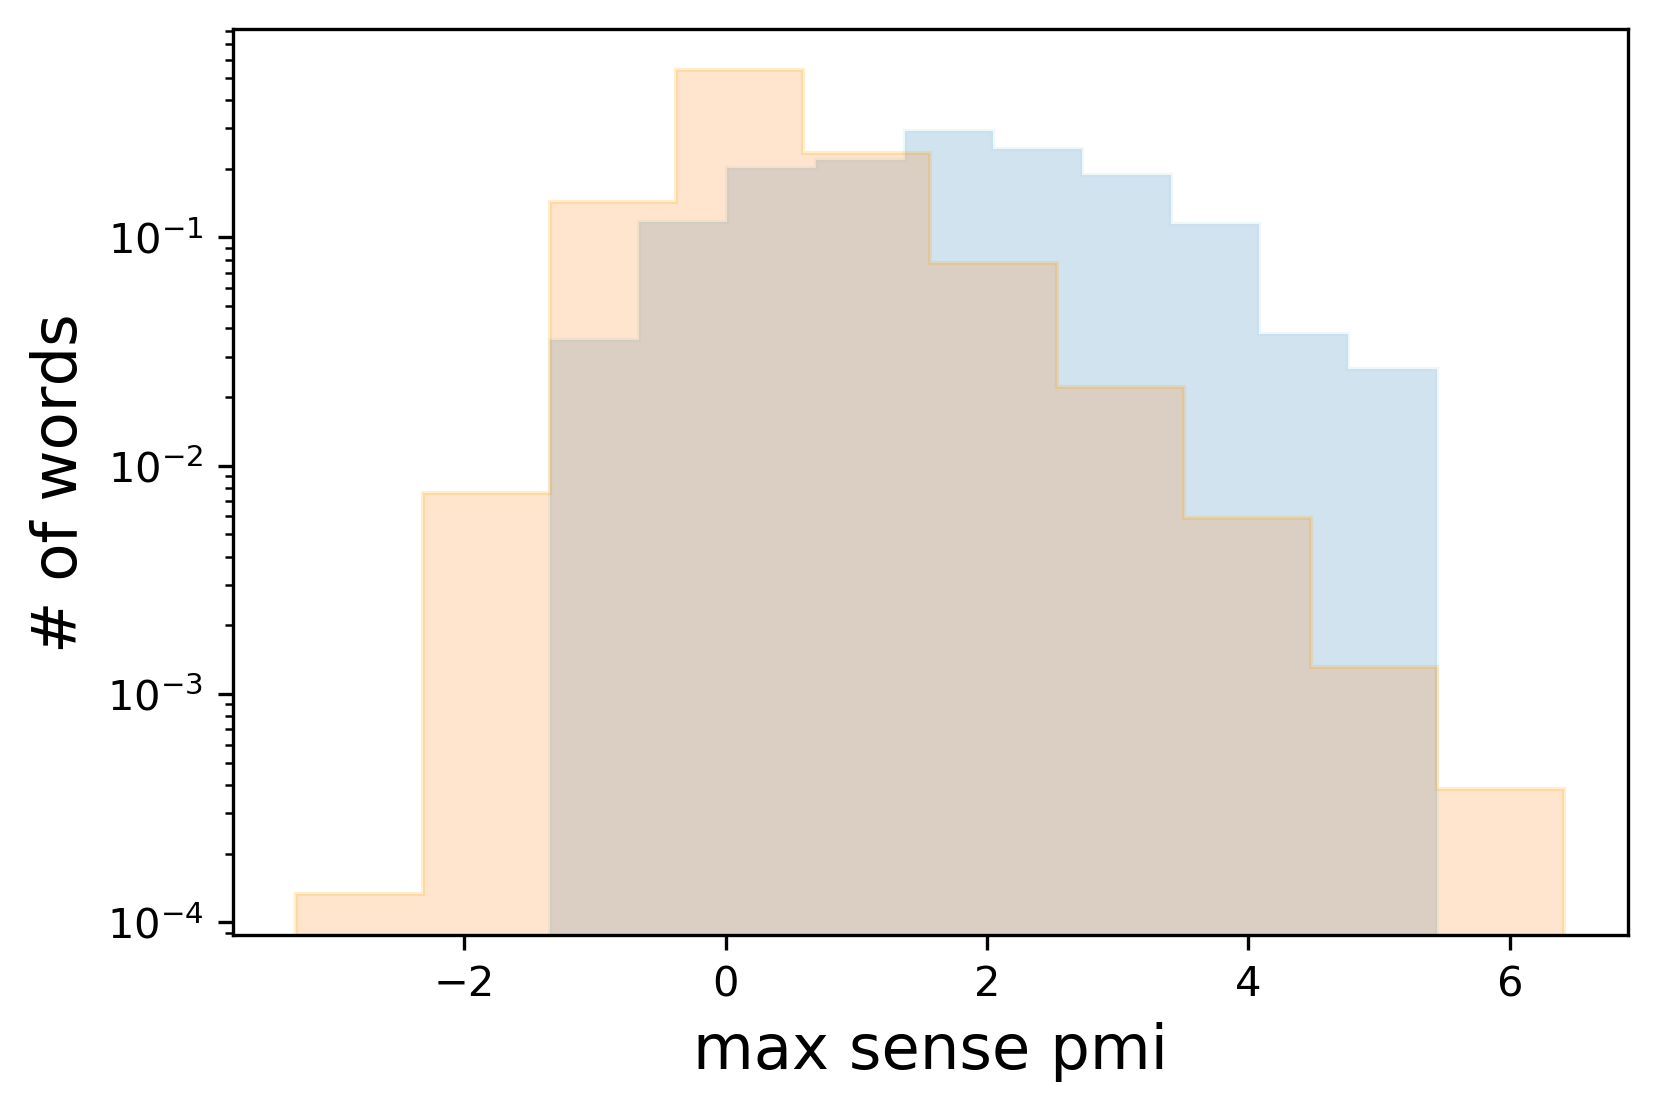

In [90]:
# sense_pmi of most common sense of a word
AG_MOST_PMI = LOG_DIR + 'ag_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(AG_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

100%|██████████| 349/349 [00:03<00:00, 88.03it/s]


Pearson r: (0.9137956058214246, 0.0)


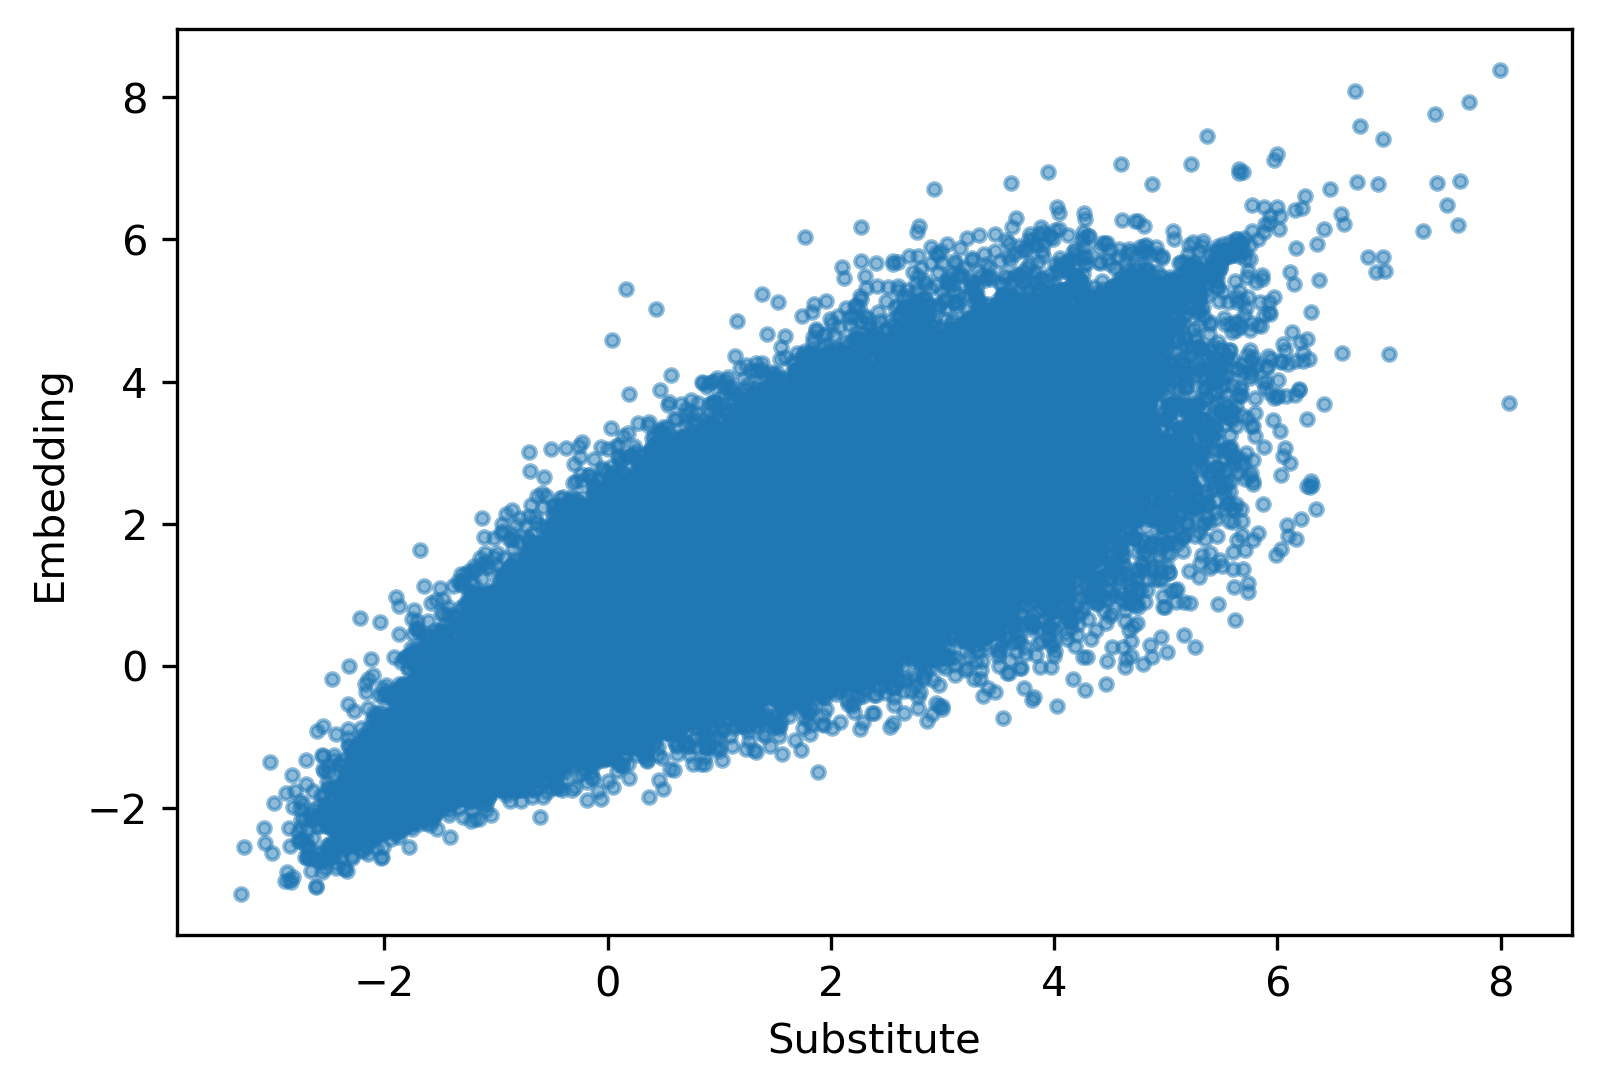

In [92]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['most_pmi_x'].tolist())
    y.extend(df3['most_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

## Type PMI

In [5]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:01<00:00, 336.17it/s]


In [6]:
print(len(gloss_vals))
print(len(not_gloss_vals))

2184
431773


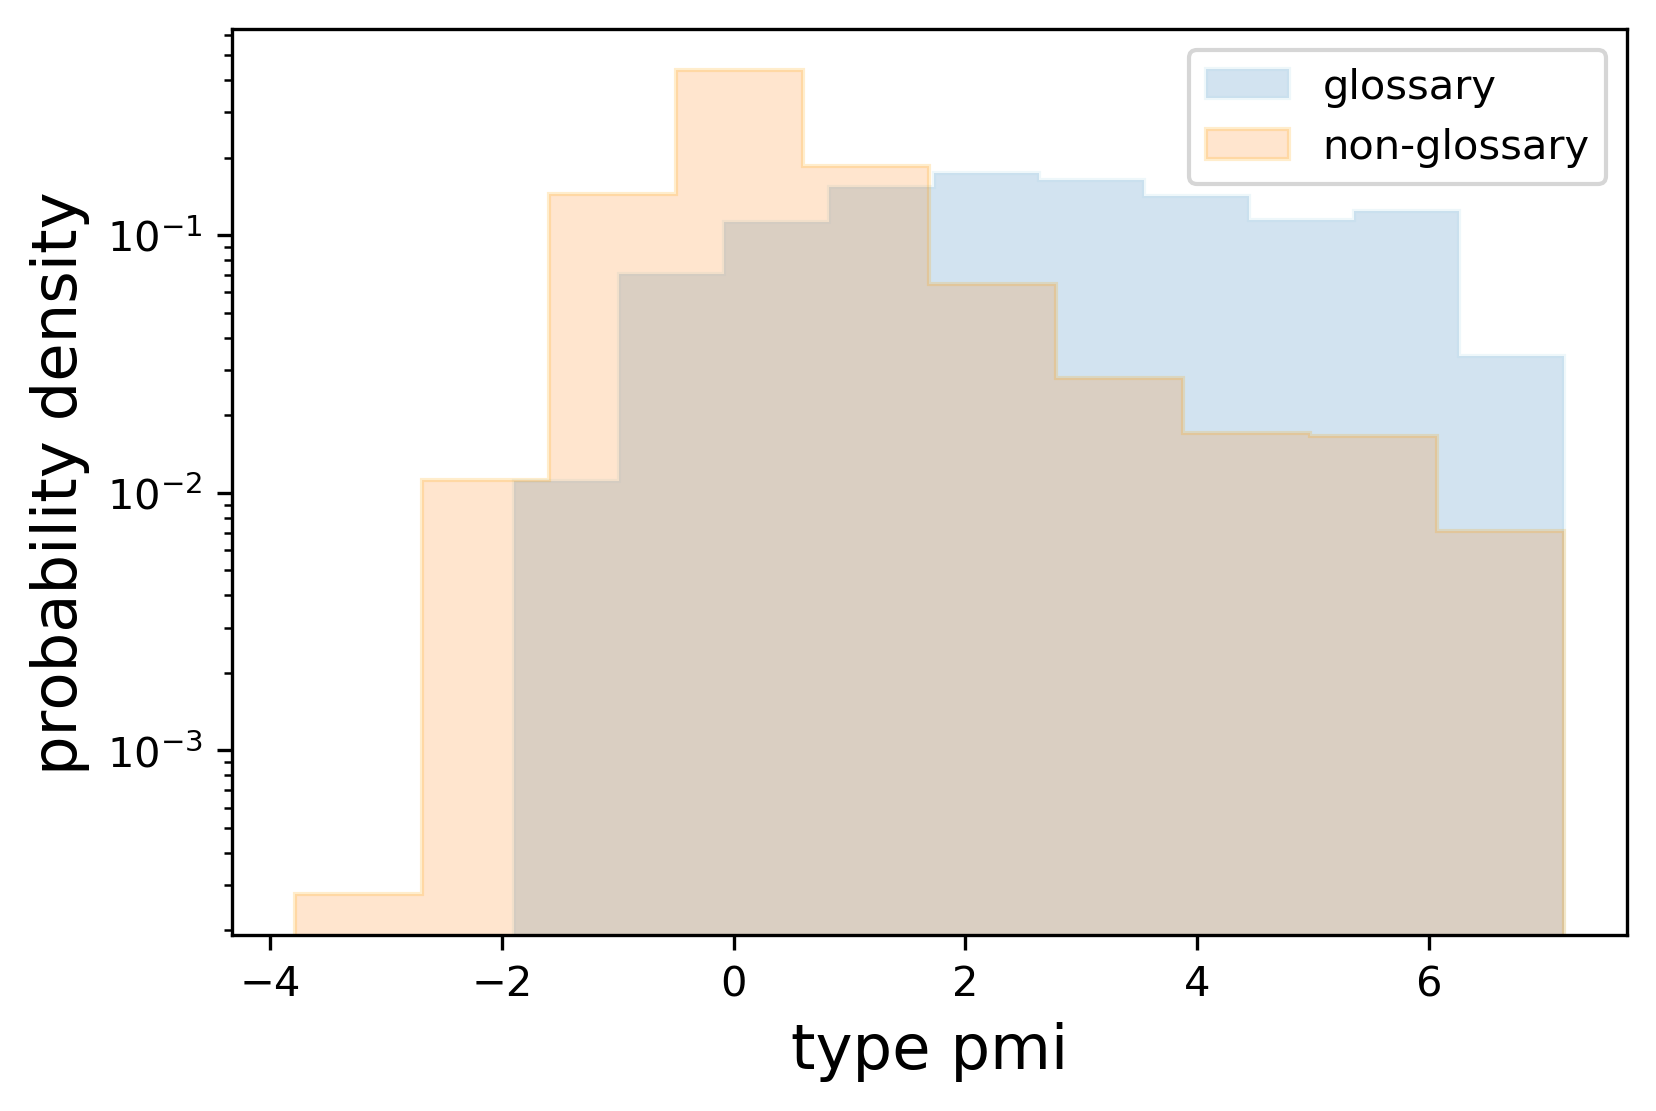

In [7]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

In [8]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=74.34385215831978, pvalue=0.0)
MannwhitneyuResult(statistic=781729601.0, pvalue=0.0)


In [9]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

2.7539354583977698
0.20878454230275614


In [10]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)

 19%|█▉        | 89/474 [00:00<00:01, 221.44it/s]

aquariums tbh -0.2905498403630227
aquariums imo -0.17780007645732757
askgaybros sub -0.29530515782475364
asoiaf subreddit -1.0915961393465712
asoiaf op -0.7949646829969779
asoiaf lol -0.47447671324461604
asoiaf so -0.005748123408464535
boxoffice for -0.39771981607065415
boxoffice am -0.37310504731282074
cats quick -0.32804615243083535
childfree so 0.002536651076899888


 31%|███       | 145/474 [00:00<00:01, 233.77it/s]

churning y -0.009402576056636113
clashroyale control -0.12902033945379635
competitiveoverwatch stick -0.15938996167149058
competitiveoverwatch control -0.018473295531109785
datingoverthirty so -0.28506314078552036
deadbydaylight is -0.1864920938064696
dnd sad -1.159013359871753
dnd mad -0.13702847076239175
dota2 b -0.2547516232434246
dota2 p -0.09130484760340599
dota2 back -0.013653026022891328
elderscrollsonline hot -0.7553906454889251
elderscrollsonline c -0.6274730014836455
elderscrollsonline drink -0.42431750908064503
elderscrollsonline tell -0.3479220047944088
elderscrollsonline war -0.33951587705339675
elderscrollsonline op -0.06330968005348456
elderscrollsonline so -0.04218877710628765
exmormon imo -0.6541672298602986
exmormon fair -0.05995946922589513
exmormon by -0.0016699654739106883


 41%|████      | 193/474 [00:00<00:01, 217.64it/s]

fifa if 0.010210272164226701
fireemblemheroes r -0.7048580739843106
fireemblemheroes is -0.32232014867072334
future_fight if -0.30416526224152596
future_fight he -0.24174053427306197
hearthstone pain -0.23034087368394834
hearthstone out -0.14423143541058978
justnomil f -0.5718392214032035
justnomil so -0.11030330385971601


 90%|████████▉ | 426/474 [00:01<00:00, 367.58it/s]

ps4 btw -0.33330605035693583
purplepilldebate so -0.9200236405171468
skincareaddiction he -1.6406332727888795
skincareaddiction pc -0.8253695684219915
skincareaddiction to -0.08224424135036393
thedivision hot -1.0537242079647602
thedivision class -0.3665629977586232
thedivision epic -0.17889088240669557
thedivision pull -0.15652049486299607


100%|██████████| 474/474 [00:01<00:00, 353.89it/s]

wow hot -0.7269374281943174
wow c -0.4890907967601963
wow b -0.4472481003151234
wow g -0.35780627561192874
wow s -0.173426909788599
wow m -0.06799723030799784
wow if -0.006477415470900067


## TFIDF

In [11]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:01<00:00, 343.80it/s]


In [12]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

0.5682132008017647
0.02367228428702984


In [13]:
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

MannwhitneyuResult(statistic=710868532.0, pvalue=0.0)


## Finetuned vs. BERT-base

In [13]:
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'

In [14]:
diff = Counter()
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))):
    subreddit = filename.replace('.csv', '')
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_ft = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_ft[w] = score
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_base = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_base[w] = score
    for w in sorted(w2score_ft.keys()): 
        diff[(subreddit, w)] = w2score_base[w] - w2score_ft[w]
mc = diff.most_common()
print("BERT-base much higher:", mc[:30])
print("Finetuned much higher:", mc[-30:])
print("Average difference:", np.mean(np.abs(list(diff.values()))), np.var(np.abs(list(diff.values()))))

100%|██████████| 474/474 [00:12<00:00, 37.66it/s]


BERT-base much higher: [(('ethtrader', 'bucks'), 4.231507749201533), (('nyyankees', 'er'), 3.8439926888464004), (('transcribersofreddit', 'commented'), 3.648899348613762), (('counting', 'movie'), 3.5530727001173554), (('counting', 'commented'), 3.044895912533729), (('eve', 'tags'), 2.8880709457903886), (('anime', 'yo'), 2.885033596836267), (('counting', 'im'), 2.8287543969924216), (('transcribersofreddit', 'basement'), 2.7586505999825515), (('adviceanimals', 'er'), 2.7253817896778174), (('codcompetitive', 'thieves'), 2.5086364169388475), (('mariomaker', 'member'), 2.486632808539604), (('gundeals', 'grain'), 2.450204706427648), (('askouija', 't'), 2.4131051624135735), (('furry_irl', 'hotel'), 2.344098953437059), (('clashofclans', 'stared'), 2.3305066922300735), (('justnomil', 'validation'), 2.324169660867542), (('sekiro', 'yo'), 2.2734487216101233), (('transcribersofreddit', 'courage'), 2.263341692903202), (('hiphopheads', 'chambers'), 2.2199799306874044), (('summonerswar', 'contact'), 

In [37]:
print("\x1b[31m BERT-base higher \x1b[0m")
print("\x1b[32m Finetuned higher \x1b[0m")
print()
for sr in sr2terms: 
    for w in sr2terms[sr]: 
        difference = diff[(sr, w)]
        if difference > 0.5: 
            print("\x1b[31m", w, sr, difference, "\x1b[0m")
        elif difference <= -0.5:
            print("\x1b[32m", w, sr, difference, "\x1b[0m")

 BERT-base higher 
 Finetuned higher 

 back afl -0.5537749384222559 
 centre afl -0.6291583945167059 
 tis airforce 0.5591833590413136 
 bah airforce -0.668082982536875 
 g aquariums 1.3166896228564722 
 sub askgaybros -0.9078890194081497 
 bf bodybuilding 1.0671404414640793 
 os boxoffice 1.1238927894911686 
 bop boxoffice 0.6185581713215402 
 bob bigbrother -0.510209930994431 
 transmission cars -0.785294949834098 
 wagon cars 0.6731307457644107 
 oops childfree -0.7512354316861274 
 discrimination christianity -0.6556816087236896 
 af churning -1.1818839629345472 
 bb churning 0.6464106791784712 
 mo churning 0.8611152406991924 
 aa churning -0.6550039472044089 
 barrel clashroyale -0.7938163173453763 
 hound clashroyale -0.7052368205515123 
 op clashroyale -0.8386257321961719 
 it clashroyale -0.5920988208822533 
 spirits clashroyale -1.7740657111917049 
 boop competitiveoverwatch -0.6335209801071726 
 peel competitiveoverwatch 0.6024563649285168 
 bbq deadbydaylight -0.5518910765

## Top 1/2 and 1/4 cutoffs

In [109]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [110]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [111]:
sense_m, sense_t = get_medians(AG_SENSE_PMI_DIR, 'most_pmi')
base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'most_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')

  2%|▏         | 8/349 [00:00<00:04, 78.57it/s]

most_pmi


  2%|▏         | 10/474 [00:00<00:04, 97.89it/s]

[0.14895115956394614, 0.3287207530114394, 0.559320335026982, 0.8865214343393767, 1.4387709219177662, 2.66291875427572, 3.1791692209041433]
most_pmi


  0%|          | 0/474 [00:00<?, ?it/s]

[0.2789802191673347, 0.48007543419270565, 0.7324234063287886, 1.0796816376343343, 1.646291431133463, 2.8615285178167453, 3.3383727377964716]
pmi


100%|██████████| 474/474 [00:10<00:00, 45.40it/s]


[0.14368642975619209, 0.3675468465645889, 0.6636654082573912, 1.110993113597629, 2.016327239070056, 5.006313171329149, 5.882297269019653]


  1%|          | 5/474 [00:00<00:10, 44.66it/s]

tfidf


100%|██████████| 474/474 [00:10<00:00, 45.61it/s]


[0.023602200307241316, 0.03866249375155715, 0.07506182094868809, 0.17762468763824268, 0.5371191533753051, 3.0837233757223963, 4.406706245604466]


In [102]:
def get_glossary_percentage(cutoff, path, metric): 
    '''
    Gets the percentage of glossary words in the cutoff percentile
    '''
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [104]:
percent, sense_set = get_glossary_percentage(sense_t, AG_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, sense_set, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, type_set = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)

 14%|█▍        | 68/474 [00:00<00:00, 630.67it/s]

0.25787106446776614


  5%|▍         | 23/474 [00:00<00:02, 208.73it/s]

0.2788104089219331


  5%|▍         | 23/474 [00:00<00:02, 212.25it/s]

0.1813186813186813


100%|██████████| 474/474 [00:01<00:00, 374.22it/s]

0.16758241758241757


In [16]:
sense_set & type_set

{('antimlm', 'hun')}

In [17]:
# total possible recall of glossary words
total_count = 0
recall_count = 0
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '').replace('_0.2', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word'] 
            score = float(row['pmi'])
            if w in gloss_terms: 
                recall_count += 1
    total_count += len(gloss_terms)
print(recall_count / total_count)

100%|██████████| 474/474 [00:01<00:00, 354.68it/s]

0.6227544910179641


### MWE vs single-token scores

In [78]:
single_vals = []
mwe_vals = []
gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)

100%|██████████| 474/474 [00:02<00:00, 208.97it/s]


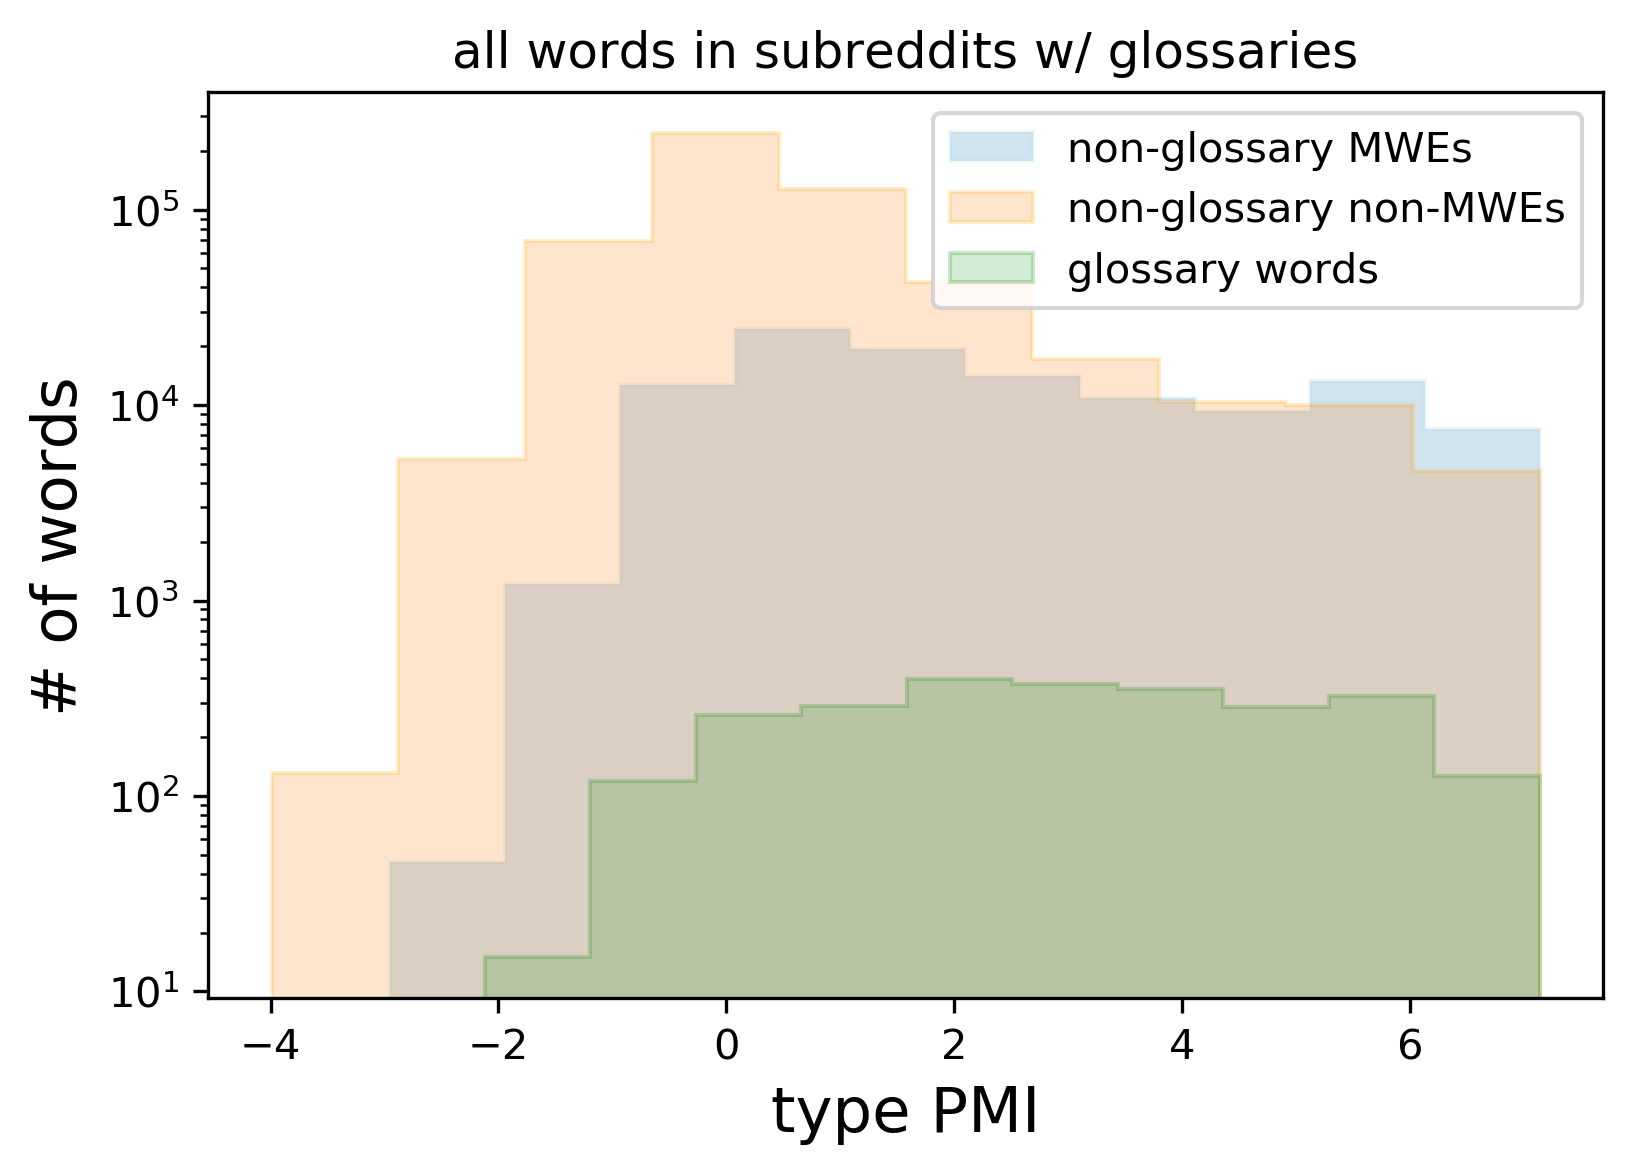

In [102]:
plt.hist(mwe_vals, label="non-glossary MWEs", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-glossary non-MWEs", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.hist(gloss_vals, label="glossary words", alpha=0.2, edgecolor='green', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("all words in subreddits w/ glossaries")
plt.legend()

In [71]:
single_vals = []
mwe_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)

100%|██████████| 474/474 [00:02<00:00, 216.37it/s]


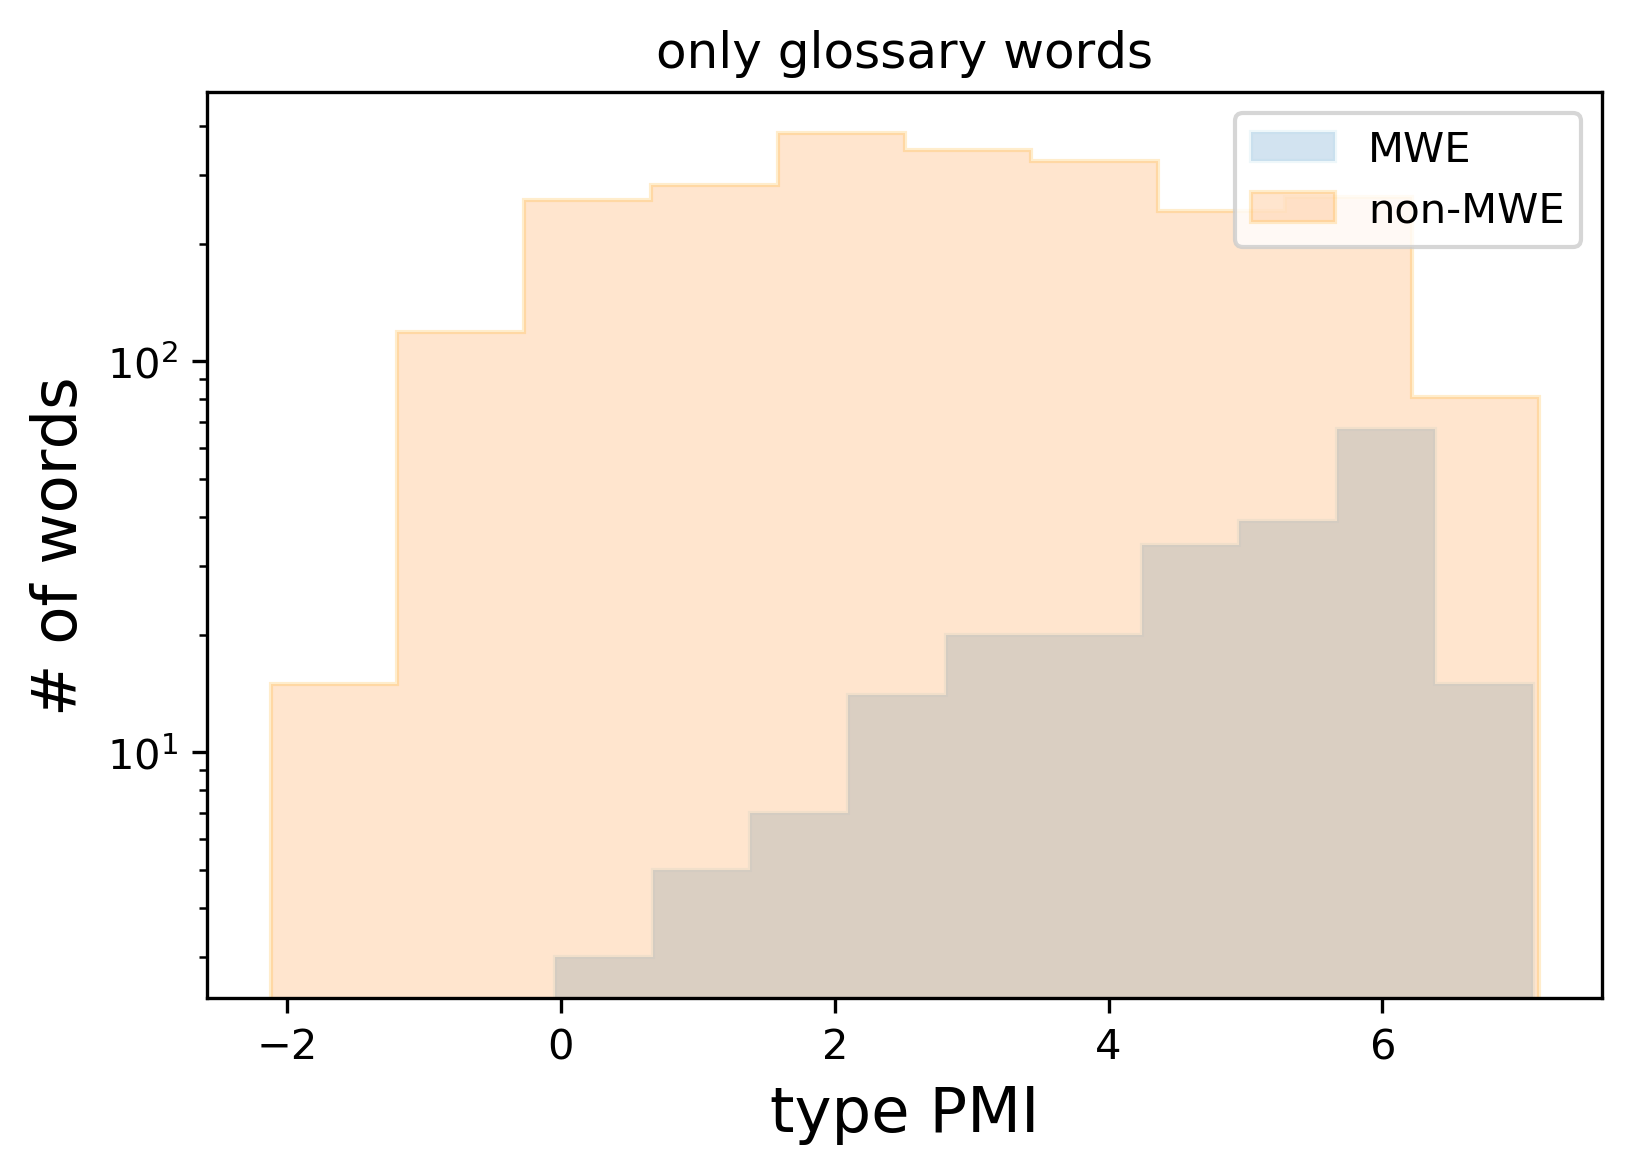

In [72]:
plt.hist(mwe_vals, label="MWE", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-MWE", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("only glossary words")
plt.legend()

### Mean reciprocal rank

In [117]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['most_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print("Number of values:",len(inv_ranks))
    print("Mean reciprocal rank:",np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:",np.median(ranks))

In [119]:
rank_highest_first(AG_SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)

100%|██████████| 474/474 [00:00<00:00, 16084.69it/s]

Number of values: 43
Mean reciprocal rank: 0.2201520294336277
Highest-scored glossary term's median rank: 8.5
Number of values: 57
Mean reciprocal rank: 0.2723655979664329
Highest-scored glossary term's median rank: 7.0


In [114]:
# lowest is first
def rank_lowest_first(path, metric): 
    """
    The input file is formatted so that the lower values
    are listed in the file first. 
    """
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print("Number of values:", len(inv_ranks))
    print("Mean reciprocal rank:", np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:", np.median(ranks))

In [24]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')

  5%|▍         | 23/474 [00:00<00:02, 213.26it/s]

Number of values: 57
Mean reciprocal rank: 0.09375181423128043
Highest-scored glossary term's median rank: 30.0


100%|██████████| 474/474 [00:01<00:00, 378.17it/s]

Number of values: 57
Mean reciprocal rank: 0.20604386284948573
Highest-scored glossary term's median rank: 13.0
